In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook'])
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.stats import linregress

# Question 1

## Part A

* The Percent depth dose is typically measured during the commisioning of a treatment unit; by calculating it at $SSD_0$, it can be computed for any other $SSD$. Given equiptment sufficient to measuring the dose at any depth $d$ in a phantom, it can be determined. It does not require adjusting the position of the beam or the phantom.
* The Tissue phantom ratio is preferred for patient dose calculations because it can take into account variations in patient size (the $SSD$ of larger patients will be smaller if the source is held at a constant position).

## Part B

<p align="center">
  <img src="images/a1p1.png" alt="drawing" width="600" align="center"/>
</p>

The general idea behind this question is as follows: to calculate a dose **in the same location of the phantom** due to a **shift in phantom position away from the scanner** ($D_0$ vs. $D_3$ in diagrams above) one can either

1. Use percent depth dose [P] to get $D_0/D_1$ (red arrow "1" above, constant SSD) and $D_1/D_2$ (two steps b/c normalized at $d_m$) and then use tissue phantom ratio [TPR] to get $D_2/D_3$ (red arrow "2" above). One can then find $D_0/D_3$

2. Using the fact that the only change is that the phantom is moving, note that $D \propto S_p(r_d) \cdot P(d, r, SSD) \cdot  (SSD+d)^{-2}$. (since the beam is constant we don't need to consider change in $S_c$, head scatter). One can then find $D_0/D_3$

Relating $D_0/D_3$ from 1 and 2 above allows one to express $S_c$ in terms of $P$ and $TPR$.

[Note: in this problem I will expressing $P=P(d,r_d, SSD)$ (using $r_d$ instead of $r$). No loss of information happens here; if one knows $d$, $r_d$ and $SSD$, they can calculate a *unique* $r$]

1. **By definition of $P$** we get $D_0/D_1 = P(d_0, r_{d_0}, SSD)$ and $D_2/D_1 = P(d, r_{d}, SSD)$. Then, **by definition of $TPR$**, we get $D_2/D_3 = TPR(d, r_{d})$. It follows that

$$ \frac{D_0}{D_3} = \frac{D_0}{D_1}\left(\frac{D_2}{D_1}\right)^{-1}\frac{D_2}{D_3} = \frac{P(d_0, r_{d_0}, SSD)}{P(d, r_{d}, SSD)} TPR(d, r_{d}) $$

2. First consider $D \propto S_p(r_d) \cdot P(d, r_d, SSD) \cdot  (SSD+d)^{-2}$. We can write

$$ \frac{D_0}{D_3} = \frac{S_p(r_{d_0}) \cdot P(d_0, r_{d_0}, SSD) \cdot  (SSD+d_0)^{-2}}{S_p(r_d) \cdot P(d_0, r_d, SSD-(d_0-d)) \cdot  (SSD + d)^{-2}}$$

Equating (1) and (2) and canceling out the $P(d_0, r_{d_0}, SSD)$ we get

$$TPR(d, r_{d}) = \frac{S_p(r_{d_0})}{S_p(r_d)} \frac{P(d, r_{d}, SSD)}{P(d_0, r_{d}, SSD-(d_0-d))}   \left(\frac{SSD+d}{SSD+d_0}\right)^2$$

Then using the Maynard factor $P(d_0, r_d, SSD+d-d_0) = P(d_0, r_d, SSD) \left(\frac{SSD+d-d_0+dm}{SSD+d}\right)^2 \left(\frac{SSD+d_0}{SSD+d_m}\right)^2$ we get

$$\boxed{TPR(d, r_{d}) = \frac{S_p(r_{d_0})}{S_p(r_d)} \frac{P(d, r_{d}, SSD)}{P(d_0, r_{d}, SSD)}   \left(\frac{SSD+d}{SSD+d_0}\right)^4 \left(\frac{SSD+d_m}{SSD+d-d_0+d_m}\right)^2}$$

As a consistency check, when $d_0=d_m$ we get $P(d_0, r_d, SSD)=P(d_m, r_d, SSD)=1$ and $\left(\frac{SSD+d}{SSD+d_0}\right)^4 \left(\frac{SSD+d_m}{SSD+d-d_0+d_m}\right)^2 = \left(\frac{SSD+d}{SSD+d_0}\right)^2$ and

$$ TPR(d, r_{d}) = P(d, r_{d}, SSD) \frac{S_p(r_{d_0})}{S_p(r_d)}  \left(\frac{SSD+d}{SSD+d_0}\right)^2 $$

which is precisely what is quoted at

http://solutioinsilico.com/medical-physics/labs/pdd-tpr-derivation.php?fbclid=IwAR0NG8DrjrsbL8QhicllvzoVvsydBPl5FxLA3NSw5-t0BUsbU5edfi9DEuQ

# Question 2

## Part A

Noting that the total dose at the maximum point is the sum of primary and scattered components 

$$D_m = D_{P_m}+D_{S_m}$$

where $D_{S_m}$ is the scattered component, and that 

$$D_m = PSF(r,E)D_{P_m}$$

by definition of the $PSF$, it follows that

$$D_{S_m} = (PSF(r,E)-1)D_{P_m}$$

With reference to the plot on page 34, the scattered component is simply the height of the curves (with respect to $y=1$ at the bottom of the plot) times the primary dose.

## Part B

The primary dose is for the 6x6 field has two expressions which we can use for the following:

* $D^{10 \times 10}_{P_m} = PSF(6,E)^{-1} D_m$ (get primary dose for 10x10 field given $D_m=300$cGy)
* $D^{6 \times 6}_{P_m} = S_p D^{10 \times 10}_{P_m}$ (find primary dose)



and the scattered dose is simply $D_m-D_{P_m}$

In [2]:
PSF = 1.078
Sp = 0.987
Dm = 300

Then

In [3]:
Dp10 = PSF**(-1) * 300
Dp6 = Sp*Dp10
Ds6 = Dm - Dp6
print(f'The primary dose is {Dp6:.2f} cGy for a 6x6 field size')
print(f'The scattered dose is {Ds6:.2f} cGy for a 6x6 field size')

The primary dose is 274.68 cGy for a 6x6 field size
The scattered dose is 25.32 cGy for a 6x6 field size


## Part C

In this case, from the "100kVp tab" of the of the first data table, we have

In [4]:
PSF = 1.187

Then

In [5]:
Dp10 = PSF**(-1) * 300
Dp6 = Dp10
Ds6 = Dm - Dp6
print(f'The primary dose is {Dp6:.2f} cGy for a 6x6 field size')
print(f'The scattered dose is {Ds6:.2f} cGy for a 6x6 field size')

The primary dose is 252.74 cGy for a 6x6 field size
The scattered dose is 47.26 cGy for a 6x6 field size


# Question 3

<p align="center">
  <img src="images/a1p3.png" alt="drawing" width="600" align="center"/>
</p>

## Part A

Let $d_1=3$cm, $d_2=6$cm and $d_3=10$cm. From the excel sheet using interpolation

* $P(d_1, r=9\text{cm}, SSD=100\text{cm}, E=6\text{MeV}) = 0.9505$
* $P(d_2, r=9\text{cm}, SSD=100\text{cm}, E=6\text{MeV}) = 0.8245$
* $P(d_3, r=9\text{cm}, SSD=100\text{cm}, E=6\text{MeV}) = 0.6695$

For $D_2$ (and $D_3$ as well) we have

$$\frac{D_1}{D_2} = \frac{D_1/D_m}{D_2/D_m} = \frac{P(d_1, r=9\text{cm}, SSD=100\text{cm}, E=6\text{MeV})}{P(d_2, r=9\text{cm}, SSD=100\text{cm}, E=6\text{MeV})} $$

In [6]:
P1 = 0.9505
P2 = 0.8245
P3 = 0.6695
D1 = 250 #cGy
D2 = P2/P1 * D1
D3 = P3/P1 * D1
print(f'The dose at 6cm is {D2:.2f} cGy')
print(f'The dose at 10cm is {D3:.2f} cGy')

The dose at 6cm is 216.86 cGy
The dose at 10cm is 176.09 cGy


## Part B

We have to adjust for the new field size at the surface $r$, which is directly proportional to the SSD. $r_{new} = \frac{90}{100} \cdot 9 = 8.1$

We need

* $P(d_1, r=8.1\text{cm}, SSD=90\text{cm}, E=6\text{MeV}) $
* $P(d_2, r=8.1\text{cm}, SSD=90\text{cm}, E=6\text{MeV}) $
* $P(d_3, r=8.1\text{cm}, SSD=90\text{cm}, E=6\text{MeV}) $

But these aren't tabulated for an SSD of 90cm so we need to use the Mayneord factor:

$$P(SSD) = P(SSD_0) \cdot \left(\frac{SSD+d_m}{SSD+d}\right)^2\left(\frac{SSD_0+d}{SSD_0+d_m}\right)^2$$





In [7]:
def mayneord(d, SSD, dm):
    return (SSD+dm)**2 / (SSD+d)**2 * (100+d)**2 / (100+dm)**2

Get percent depth doses and doses at 6 and 10 cm (assume $d_m=1.5$cm). $P(SSD_0)$ values were found by interpolating the excel data tables.

In [8]:
P1 = 0.9501 * mayneord(3, 90, 1.5)
P2 = 0.8214 * mayneord(6, 90, 1.5)
P3 = 0.6646 * mayneord(10, 90, 1.5)
D1 = 250 #cGy
D2 = P2/P1 * D1
D3 = P3/P1 * D1
print(f'The dose at 6cm is {D2:.2f} cGy')
print(f'The dose at 10cm is {D3:.2f} cGy')

The dose at 6cm is 214.83 cGy
The dose at 10cm is 172.51 cGy


# Question 4

## Part A

Let $f$ represent the effective $SSD$ for shorthand notation. First we define all data given to us in the problem

In [9]:
f_init = 100
rd0 = 15
doses1 = np.array([199.8, 179.2, 161.6, 146.1])
doses2 = np.array([196.2, 177.4, 161.1, 146.6])
doses3 = np.array([192.0, 172.8, 155.7, 141.5])
g_vals = np.array([0, 5, 10, 15]) #

For the curve fit, we need corresponding $x$ and $y$ data. Noting that

$$\sqrt{\frac{D_{m_0}}{D_m}} = 1 + \left(\frac{1}{f+d_m}\right) g$$

setting out `ydata` as $\sqrt{\frac{D_{m_0}}{D_m}}$ and `xdata` as $g$ will yield

$$y = mx + b$$

where $m=\frac{1}{f}+d_m$ and $b=1$

In [10]:
xdata = g_vals
ydata1 = np.sqrt(max(doses1)/doses1)
ydata2 = np.sqrt(max(doses2)/doses2)
ydata3 = np.sqrt(max(doses3)/doses3)

Function to take in `xdata` and `ydata` and return the corresponding $f$ given by

$$f = \frac{1}{m} - d_m$$

where $m$ is the slope from ditting `xdata` and `ydata` and $d_m$ is the depth at maximum dose

In [11]:
def get_effSSD(xdata, ydata, dm):
    m, intercept, r, p, se = linregress(xdata, ydata)
    return 1/m - dm, m

Get optimal effective SSDs based on given data:

In [12]:
f_opt1, m1 = get_effSSD(xdata, ydata1, dm= 1.5)
f_opt2, m2 = get_effSSD(xdata, ydata2, dm= 3)
f_opt3, m3 = get_effSSD(xdata, ydata3, dm= 4)

Function that computes the predicted ratio of doses (compared to $D_m$) at a given depth $x$. In ion mode, the scatter fraction does not need to be corrected for. For a regular phantom, we do need to account for this (in part B)

In [13]:
def compute_predicted_ratio(x, f, dm=1.5, Sp_f=None, ion=True):  
    if ion:
        return (f+dm)**2 / (f+dm+x)**2  
    else:
        rd0 = 15*(f+dm)/f #field size at dm
        rd = (f+dm+x)/(f+dm) * rd0 #field size at depth x
        return Sp_f(rd)/Sp_f(rd0) * (f+dm)**2 / (f+dm+x)**2

Get predicted dose ratios at various depths. We want to see if our fit is good.

In [14]:
x =np.linspace(0, 15, 1000)
y1 = compute_predicted_ratio(x, f_opt1, ion=True)
y2 = compute_predicted_ratio(x, f_opt2, ion=True)
y3 = compute_predicted_ratio(x, f_opt3, ion=True)

Plot

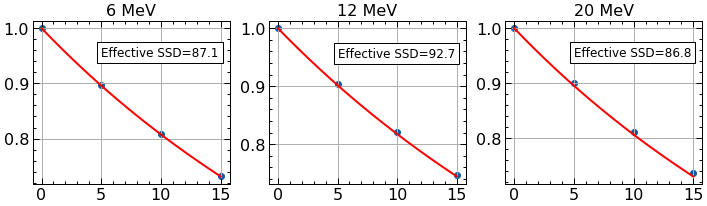

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12,3))
ax[0].scatter(g_vals, doses1/max(doses1), label='Data')
ax[0].plot(x,y1, color='r', label='Fit')
ax[0].set_title('6 MeV')
ax[1].scatter(g_vals, doses2/max(doses2), label='Data')
ax[1].plot(x,y2, color='r')
ax[1].set_title('12 MeV')
ax[2].scatter(g_vals, doses3/max(doses3), label='Data')
ax[2].plot(x,y3, color='r')
ax[2].set_title('20 MeV')
[a.grid() for a in ax]
[a.text(5, 0.95, f'Effective SSD={f:.1f}', fontsize=12,
        bbox=dict(facecolor='white', edgecolor='k')) for (a,f) in zip(ax, [f_opt1, f_opt2, f_opt3])]
plt.show()

## Part B

Create a function `Sp_f` that can find the primary scatter fraction $S_p$ at any depth. Do this using interpolation

In [16]:
Sps = np.array([0.979, 0.987, 0.994, 1, 1.013, 1.023, 1.033, 1.037, 1.040])
rds = np.array([4, 6, 8, 10, 15, 20, 25, 30, 40])
Sp_f = interp1d(rds, Sps)

Use scatter fraction plus information from part A to get computed dose

In [17]:
dose = 0.981 * compute_predicted_ratio(x=8, f=f_opt2, Sp_f=Sp_f, dm=3, ion=True)
print(f'Estimated dose is {dose:.5f} cGy')

Estimated dose is 0.83547 cGy


# Question 5

We will use the following scheme (green star represents isocenter). Occasionally, values of $r_d$ above 40 are obtained and required as inputs to some of the dosimetric functions. The data tables, however, can not interpolate to this value (it is outside of the maximum range). The general approximation used is that around $r_d=40$, quantities such as $S_p$, $S_c$, and $P$ don't change considerably with $r_d$. As such, we take their value at $r_d=40$.

<p align="center">
  <img src="images/a1p2.png" alt="drawing" width="1200" align="center"/>
</p>

Denoting the dose in the four diagrams as $D_1$ to $D_5$, we get

1. Using the Mayneord factor correction, since our $SSD$ is at 90cm and not at $SSD_0=100cm$ like it is in the table, and using the fact that $r=9$ (surface of phantom) using similar triangles: 

$$\frac{D_1}{D_2} = P(10,9,90) = P(10,9,100) \cdot \left( \frac{90+d_m}{90+10} \right)^2 \left( \frac{100+10}{100+d_m} \right)^2$$

2. Using the fact that $D \propto S_p(r_d) \cdot  (SSD+d)^{-2}$ at $d_m=1.5$cm, and that the field size is directly proportional to the $SPD$ (which is 10x10 at 100cm) we can write

$$\frac{D_2}{D_3} =  \frac{S_p(9.15)}{S_p(13.15)}\left(\frac{130+1.5}{90+1.5}\right)^2 $$

3. For $S_{c,p}$ we need to find $r_d$ at the dose point in the 4th diagram. In this case, $r_d$ increases by a factor of 3.3 (i.e. 3.3 $\times$ 13.15 ) from the previous diagram (from 10x10 to 33x33)

$$ \frac{D_4}{D_3} = S_c(43.4)S_p(43.4) $$

4. Finally, for the last transformation, using Mayneord factors, we have

$$\frac{D_5}{D_4} = P(6,43.4,130) = P(6,43.4,100) \left( \frac{130+d_m}{130+6} \right)^2 \left( \frac{100+6}{100+d_m} \right)^2$$

**Note the tables given in the data sheets only go up to $r=40$, but noting how minute the rate of change is for these larger values, it will be sufficient to take values corresponding $r=40$, even though we have a value of $r=43.4$ for our final few steps, and incur an error of only approximately 1%**.

$D_1/D_5$ is obtained by multiplying all these fractions (some of them inverse)

$$\frac{D_1}{D_5} = P(10,9,100) \cdot \left( \frac{90+d_m}{90+10} \right)^2 \left( \frac{100+10}{100+d_m} \right)^2 \frac{S_p(9.15)}{S_p(13.15)}\left(\frac{130+1.5}{90+1.5}\right)^2  \frac{1}{S_c(43.4)S_p(43.4)} \frac{1}{P(6,43.4,100)} \left( \frac{130+6}{130+d_m} \right)^2 \left( \frac{100+d_m}{100+6} \right)^2$$

Defining all the factors in order:

In [18]:
dm = 1.5
f1 = 0.6695
f2 = (90+dm)**2 / (90+10)**2
f3 = (100+10)**2 / (100+dm)**2
f4 = 0.99745 / 1.00819
f5 = (130+1.5)**2 / (90+1.5)**2
f6 = 1 / (1.046 * 1.04)
f7 = 1/0.855
f8 = (130+6)**2 / (130+dm)**2
f9 = (100+dm)**2 / (100+6)**2

And find the value:

In [19]:
D5 = 1/np.prod([f1,f2,f3,f4,f5,f6,f7,f8,f9]) * 0.786
print(f'The determined dose rate at the new location is {D5:.2f}cGy/MU')

The determined dose rate at the new location is 0.55cGy/MU
